<a href="https://colab.research.google.com/github/TheThing-CV/Pandas/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas course

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## First steps

Pandas is an open source, free to use (under a BSD license) and it was originally written by Wes McKinney. The name is derived from the term “panel data”, an econometrics term for multidimensional structured data sets.

In [0]:
from IPython.display import Image

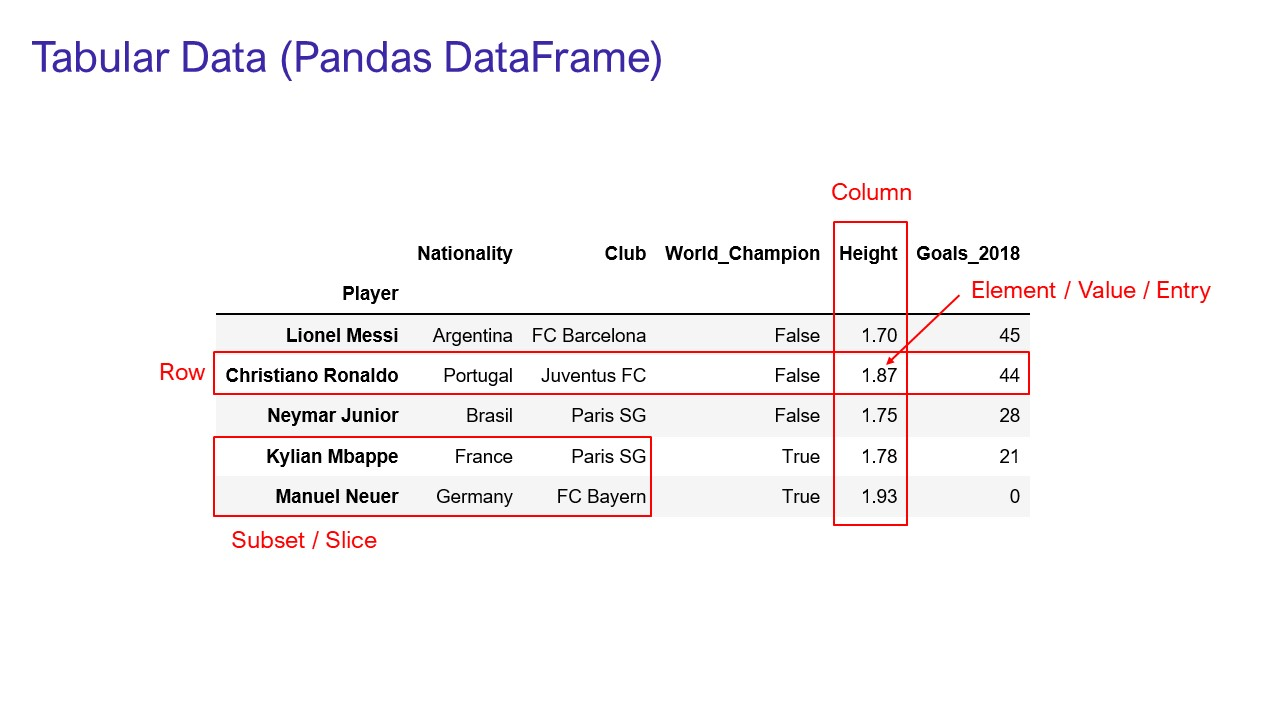

In [58]:
Image('/content/drive/My Drive/Colab Notebooks/Images/1.jpg')

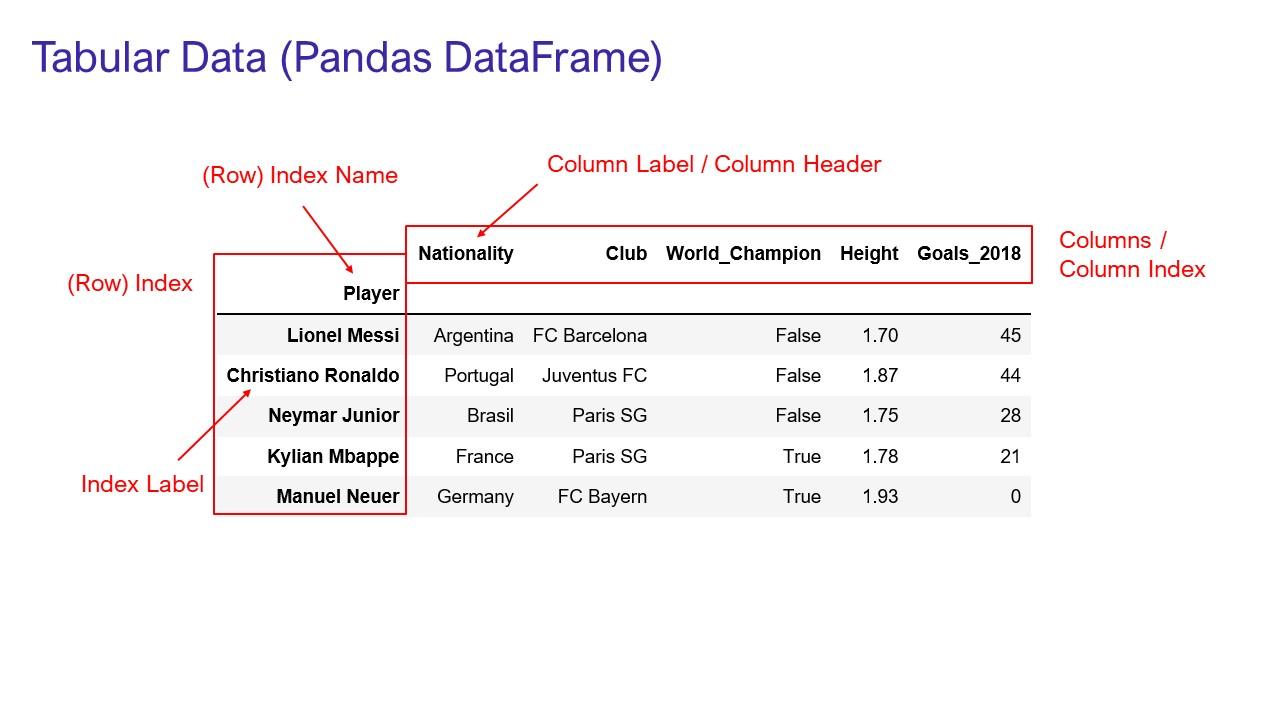

In [59]:
Image('/content/drive/My Drive/Colab Notebooks/Images/2.jpg')

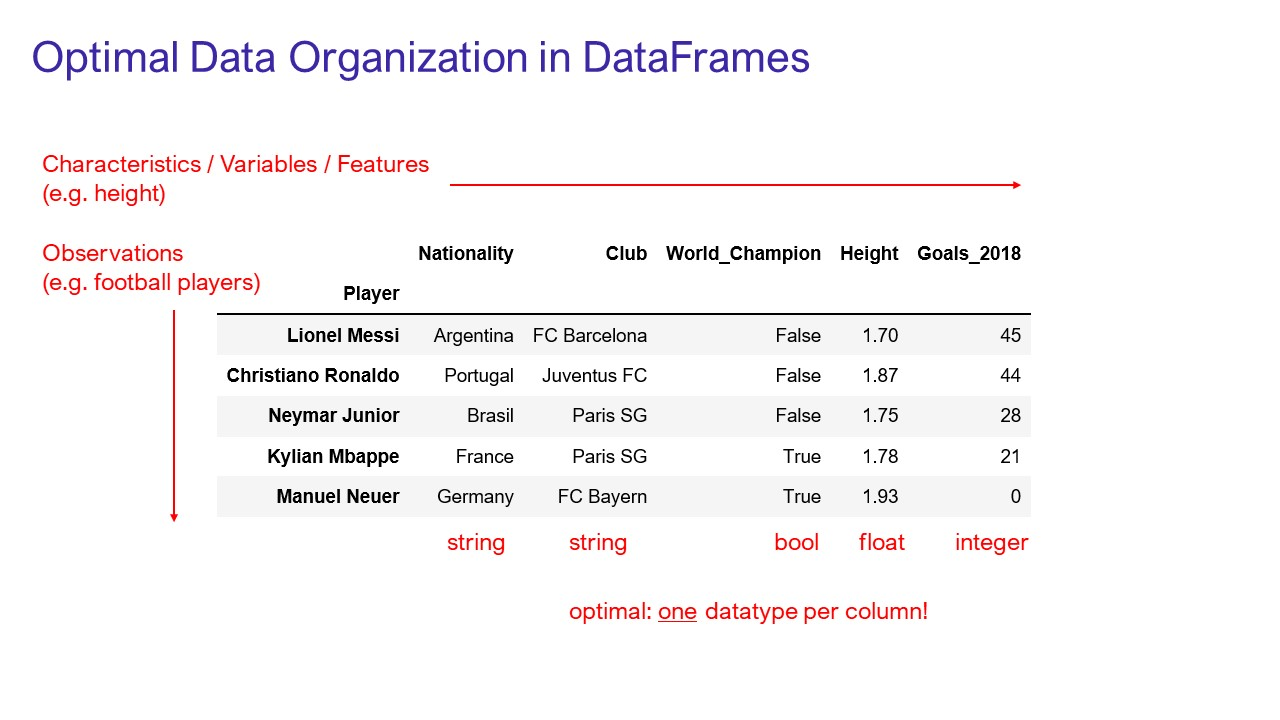

In [60]:
Image('/content/drive/My Drive/Colab Notebooks/Images/3.jpg')

In [61]:
# import pandas using standart conventions
import pandas as pd
pd.__version__

'0.24.2'

In [62]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/titanic.csv')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
...,...,...,...,...,...,...,...,...,...
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN


In [0]:
pd.options.display.max_rows = 8

In [64]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
...,...,...,...,...,...,...,...,...,...
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN


In [65]:
print(data) # not formatted output

     survived  pclass     sex   age  sibsp  parch     fare embarked deck
0           0       3    male  22.0      1      0   7.2500        S  NaN
1           1       1  female  38.0      1      0  71.2833        C    C
2           1       3  female  26.0      0      0   7.9250        S  NaN
3           1       1  female  35.0      1      0  53.1000        S    C
..        ...     ...     ...   ...    ...    ...      ...      ...  ...
887         1       1  female  19.0      0      0  30.0000        S    B
888         0       3  female   NaN      1      2  23.4500        S  NaN
889         1       1    male  26.0      0      0  30.0000        C    C
890         0       3    male  32.0      0      0   7.7500        Q  NaN

[891 rows x 9 columns]


Two handy functions to view the first and last rows of data:

In [66]:
data.head(4) # 5 is default

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C


In [67]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


To get the column names as an index object, use columns property:

In [68]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

If you want to convert these to a Python list, use **to_list()** fucntion:

In [69]:
data.columns.to_list()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'deck']

The row index is extracted using:

In [70]:
data.index

RangeIndex(start=0, stop=891, step=1)

In this case we can see row index of type RangeIndex.

In [71]:
data.shape # quick look at the dimensions

(891, 9)

Another useful method is **info()** - it shows metadata of our DataFrame:

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    889 non-null object
deck        203 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


We can see, that some columns contained missing data. But how many exactly?

In [73]:
data.isna().sum()

survived      0
pclass        0
sex           0
age         177
           ... 
parch         0
fare          0
embarked      2
deck        688
Length: 9, dtype: int64

To see the descriptive statistics for our data:

In [74]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As you can see from the table above, only 38% of passengers survived the disaster. 

In [75]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


You can round all the DataFrame to specified decimals or select the columns:

In [76]:
data.round(1) # round the entire DataFrame

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2,S,NaN
1,1,1,female,38.0,1,0,71.3,C,C
2,1,3,female,26.0,0,0,7.9,S,NaN
3,1,1,female,35.0,1,0,53.1,S,C
...,...,...,...,...,...,...,...,...,...
887,1,1,female,19.0,0,0,30.0,S,B
888,0,3,female,NaN,1,2,23.4,S,NaN
889,1,1,male,26.0,0,0,30.0,C,C
890,0,3,male,32.0,0,0,7.8,Q,NaN


In [77]:
data.round({'age': 0, 'fare': 2}) # round the spicified columns in a dictionary

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.25,S,NaN
1,1,1,female,38.0,1,0,71.28,C,C
2,1,3,female,26.0,0,0,7.92,S,NaN
3,1,1,female,35.0,1,0,53.10,S,C
...,...,...,...,...,...,...,...,...,...
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


## Selecting columns from the DataFrame

One way of selecting columns is to to ['column name'] notation:

In [78]:
data['age'] # Series is returned

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [79]:
data[['age']] # DataFrame is returned

,age
0,22.0
1,38.0
2,26.0
3,35.0
...,...
887,19.0
888,NaN
889,26.0
890,32.0


In [80]:
# selecting several columns
data[['age', 'sex']]

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
...,...,...
887,19.0,female
888,NaN,female
889,26.0,male
890,32.0,male


You can also select column with .

In [81]:
data.age

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

But there are strong arguments against using this method of selections. There are 5 reasons to always use bracket notation It works for columns that 1. Have spaces 2. Have the same name as a method 3. Are variables 4. Are non-string 5. Are created None of these are possible with dot notation, which should be deprecated. 

## Position-based indexing with iloc

In [0]:
summer_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/summer.csv')

In [83]:
summer_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [84]:
summer_data.iloc[0] # the very first row as a Series

Year                    1896
City                  Athens
Sport               Aquatics
Discipline          Swimming
                   ...      
Country                  HUN
Gender                   Men
Event         100M Freestyle
Medal                   Gold
Name: 0, Length: 9, dtype: object

You can use slices to select multiple rows:

In [85]:
summer_data.iloc[:5]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [86]:
summer_data.iloc[-3:]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze
